In [1]:
! rm -r *
! git clone https://github.com/prabhunithingollapudi007/HandSignClassification

Cloning into 'HandSignClassification'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 1075 (delta 4), reused 27 (delta 1), pack-reused 1036
Receiving objects: 100% (1075/1075), 446.40 MiB | 22.56 MiB/s, done.
Resolving deltas: 100% (205/205), done.
Checking out files: 100% (963/963), done.


In [0]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob

In [0]:
CLASSES = 10
TRAIN_SAMPLES_EACH_CLASS = 9
TEST_SAMPLES_EACH_CLASS = 5

In [0]:
zeros_train = glob('HandSignClassification/train/Zero/*.txt')
ones_train = glob('HandSignClassification/train/One/*.txt')
twos_train = glob('HandSignClassification/train/Two/*.txt')

threes_train = glob('HandSignClassification/train/Three/*.txt')
fours_train = glob('HandSignClassification/train/Four/*.txt')
fives_train = glob('HandSignClassification/train/Five/*.txt')

sixes_train = glob('HandSignClassification/train/Six/*.txt')
sevens_train = glob('HandSignClassification/train/Seven/*.txt')
eights_train = glob('HandSignClassification/train/Eight/*.txt')
nines_train = glob('HandSignClassification/train/Nine/*.txt')

In [0]:
zeros_test = glob('HandSignClassification/test/Zero/*.txt')
ones_test = glob('HandSignClassification/test/One/*.txt')
twos_test = glob('HandSignClassification/test/Two/*.txt')

threes_test = glob('HandSignClassification/test/Three/*.txt')
fours_test = glob('HandSignClassification/test/Four/*.txt')
fives_test = glob('HandSignClassification/test/Five/*.txt')

sixes_test = glob('HandSignClassification/test/Six/*.txt')
sevens_test = glob('HandSignClassification/test/Seven/*.txt')
eights_test = glob('HandSignClassification/test/Eight/*.txt')
nines_test = glob('HandSignClassification/test/Nine/*.txt')

In [0]:
def get_appended_data_arrays(files):
  temp_array = []
  for file in files:
    temp_array.append(get_data_array(file))
  return np.array(temp_array)

In [0]:
def get_data_array(file_path):
  with open(file_path) as src_file:
    data_array = np.empty((303360, 4))
    for index, line in enumerate(src_file.readlines()):
      data_array[index] = [int(x) for x in line.split()]    
    data_array = np.reshape(data_array, (480, 632, 4))
    data_array = data_array.astype(np.uint8)
    return data_array

In [0]:
def my_one_hot_encoder_generator(nclasses, nthclass):
  temp = [0] * nclasses
  temp[nthclass] = 1
  return np.array(temp)

In [0]:
complete_output_array_test = []
complete_output_array_train = []

for nthclass in range(CLASSES):
  temp_array = []
  for sample in range(TRAIN_SAMPLES_EACH_CLASS):
    temp_array.append(my_one_hot_encoder_generator(CLASSES, nthclass))
  complete_output_array_train.append(np.array(temp_array))


for nthclass in range(CLASSES):
  temp_array = []
  for sample in range(TEST_SAMPLES_EACH_CLASS):
    temp_array.append(my_one_hot_encoder_generator(CLASSES, nthclass))
  complete_output_array_test.append(np.array(temp_array))

In [0]:
complete_input_array_train = []
complete_input_array_test = []
complete_unseen_array = []

train_files = [zeros_train[1:], ones_train[1:], twos_train[1:], threes_train[1:], fours_train[1:], fives_train[1:], sixes_train[1:], sevens_train[1:], eights_train[1:], nines_train[1:]]
test_files = [zeros_test, ones_test, twos_test, threes_test, fours_test, fives_test, sixes_test, sevens_test, eights_test, nines_test]
unseen_files = [ [x] for x in [zeros_train[0], ones_train[0], twos_train[0], threes_train[0], fours_train[0], fives_train[0], sixes_train[0], sevens_train[0], eights_train[0], nines_train[0]]]

for files in train_files:
  complete_input_array_train.append(get_appended_data_arrays(files))
for files in test_files:
  complete_input_array_test.append(get_appended_data_arrays(files))
for files in unseen_files:
  complete_unseen_array.append(get_appended_data_arrays(files))

In [0]:
zeros = [complete_input_array_train[0][y] for y in [int(x[-5]) for x in np.random.choice(zeros_train, 1)]][0]

ones = [complete_input_array_train[1][y] for y in [int(x[-5]) for x in np.random.choice(ones_train, 1)]][0]
twos = [complete_input_array_train[2][y] for y in [int(x[-5]) for x in np.random.choice(twos_train, 1)]][0]
threes = [complete_input_array_train[3][y] for y in [int(x[-5]) for x in np.random.choice(threes_train, 1)]][0]

fours = [complete_input_array_train[4][y] for y in [int(x[-5]) for x in np.random.choice(fours_train, 1)]][0]
fives = [complete_input_array_train[5][y] for y in [int(x[-5]) for x in np.random.choice(fives_train, 1)]][0]
sixes = [complete_input_array_train[6][y] for y in [int(x[-5]) for x in np.random.choice(sixes_train, 1)]][0]

sevens = [complete_input_array_train[7][y] for y in [int(x[-5]) for x in np.random.choice(sevens_train, 1)]][0]
eights = [complete_input_array_train[8][y] for y in [int(x[-5]) for x in np.random.choice(eights_train, 1)]][0]
nines = [complete_input_array_train[9][y] for y in [int(x[-5]) for x in np.random.choice(nines_train, 1)]][0]

data = [zeros, ones, twos, threes, fours, fives, sixes, sevens, eights, nines]
labels = ['Zero'] + ['One'] + ['Two'] + ['Three'] + ['Four'] + ['Five'] + ['Six'] + ['Seven'] + ['Eight'] + ['Nine']



N, R, C = 25, 5, 5
plt.figure(figsize=(20, 20))
for k, src in enumerate(data):
    #im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(labels[k])
    plt.imshow(src)
    plt.axis('off')




N, R, C = 25, 5, 5
plt.figure(figsize=(20, 20))
for k, src in enumerate(data):
    #im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(labels[k])
    plt.imshow(src[:, :, :3])
    plt.axis('off')



N, R, C = 25, 5, 5
plt.figure(figsize=(20, 20))
for k, src in enumerate(data):
    #im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(labels[k])
    fg = Image.fromarray(src[:, :, 3])
    plt.imshow(fg, cmap='gray')
    plt.axis('off')

In [0]:
complete_input_array_train = np.array(complete_input_array_train)
complete_input_array_test = np.array(complete_input_array_test)
complete_unseen_array = np.array(complete_unseen_array)

complete_output_array_train = np.array(complete_output_array_train)
complete_output_array_test = np.array(complete_output_array_test)

In [0]:
complete_input_array_train = complete_input_array_train.reshape(90,480,632,4)
complete_input_array_test = complete_input_array_test.reshape(50,480,632,4)
complete_unseen_array = complete_unseen_array.reshape(10,480,632,4)


In [0]:
complete_output_array_train = complete_output_array_train.reshape(90, 10)
complete_output_array_test = complete_output_array_test.reshape(50, 10)

In [78]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.callbacks import EarlyStopping

#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(480,632,4)))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 478, 630, 64)      2368      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 239, 315, 64)      0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 239, 315, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 237, 313, 32)      18464     
_________________________________________________________________
flatten_9 (Flatten)          (None, 2373792)           0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                23737930  
Total params: 23,758,762
Trainable params: 23,758,762
Non-trainable params: 0
__________________________________________

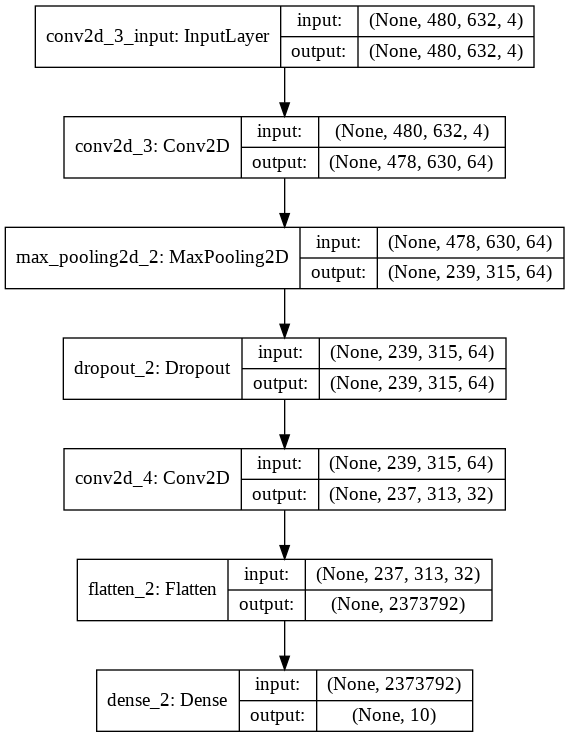

In [48]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png',show_shapes=True,show_layer_names=True)

In [79]:
es = EarlyStopping(monitor='val_accuracy', patience=2, mode='auto', verbose=1)
history = model.fit(complete_input_array_train, complete_output_array_train, validation_data=(complete_input_array_test, complete_output_array_test), epochs=8, callbacks=[es])

Train on 90 samples, validate on 50 samples
Epoch 1/8
90/90 [==============================] - 58s 643ms/step - loss: 19802.0488 - accuracy: 0.1333 - val_loss: 22411.2238 - val_accuracy: 0.1000
Epoch 2/8
90/90 [==============================] - 58s 641ms/step - loss: 19738.1944 - accuracy: 0.1222 - val_loss: 553.2877 - val_accuracy: 0.1000
Epoch 3/8
90/90 [==============================] - 58s 640ms/step - loss: 1686.9024 - accuracy: 0.1111 - val_loss: 2.3023 - val_accuracy: 0.3200
Epoch 4/8
90/90 [==============================] - 58s 640ms/step - loss: 80.3809 - accuracy: 0.2111 - val_loss: 1.9747 - val_accuracy: 0.7600
Epoch 5/8
90/90 [==============================] - 58s 643ms/step - loss: 1.7637 - accuracy: 0.5000 - val_loss: 1.1592 - val_accuracy: 0.9400
Epoch 6/8
90/90 [==============================] - 58s 641ms/step - loss: 0.3334 - accuracy: 0.8667 - val_loss: 1.6526 - val_accuracy: 0.9200
Epoch 7/8
90/90 [==============================] - 58s 645ms/step - loss: 0.1614 - acc

In [0]:
def plot_training(history):
  acc=history.history['accuracy']
  val_acc=history.history['val_accuracy']
  loss=history.history['loss']
  val_loss=history.history['val_loss']
  epochs=range(len(acc))
  plt.plot(epochs,acc,'r')
  plt.plot(epochs,val_acc,'g')
  plt.title('Training and Validation accuracy')
  plt.legend(['training accuracy', 'validation accuracy'])

  plt.figure()
  plt.plot(epochs,loss,'r')
  plt.plot(epochs,val_loss,'g')
  plt.legend()
  plt.title('Training and Validation loss')
  plt.legend(['training loss', 'validation loss'])

  plt.show()


No handles with labels found to put in legend.


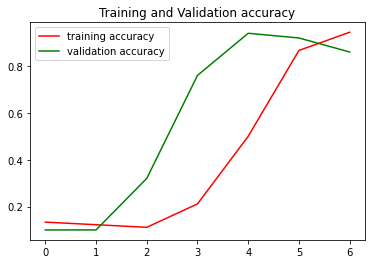

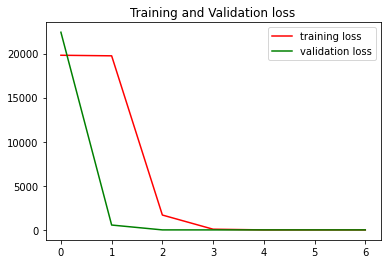

In [84]:
plot_training(history)

In [0]:
MODEL_FILE = 'classifier.model'
#model.save(MODEL_FILE)


# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def get_true_values(classes, samples):
  my_true_values = []
  for i in range(classes):
    for j in range(samples):
      my_true_values.append(i)
  return my_true_values

In [0]:
def convert_predictions(preds):
  temp_array = []
  for i in range(len(preds)):
    temp_array.append(np.argmax(preds[i]))
  return temp_array

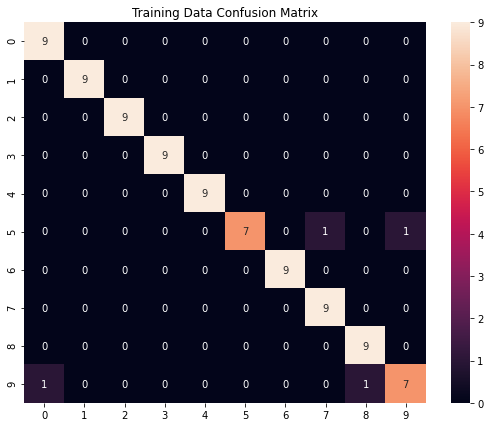

In [85]:
cm = confusion_matrix(get_true_values(10, 9), convert_predictions(model.predict(complete_input_array_train)))
plt.figure(figsize=(9, 7))
plt.title("Training Data Confusion Matrix")
sns.heatmap(cm, annot=True, annot_kws={"size": 10})

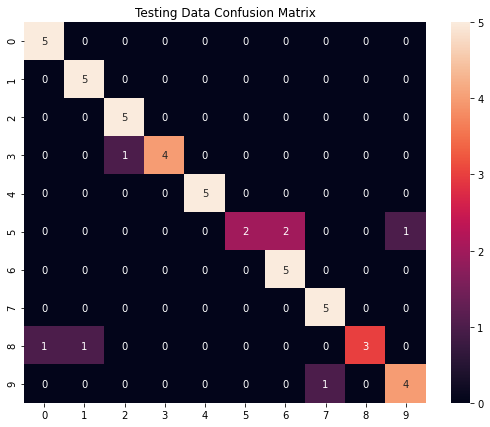

In [90]:
cm = confusion_matrix(get_true_values(10, 5), convert_predictions(model.predict(complete_input_array_test)))
plt.figure(figsize=(9, 7))
plt.title("Testing Data Confusion Matrix")
sns.heatmap(cm, annot=True, annot_kws={"size": 10})

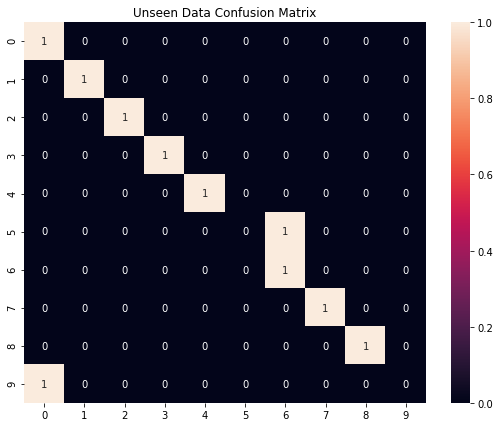

In [89]:
cm = confusion_matrix(get_true_values(10, 1), convert_predictions(model.predict(complete_unseen_array)))
plt.figure(figsize=(9, 7))
plt.title("Unseen Data Confusion Matrix")
sns.heatmap(cm, annot=True, annot_kws={"size": 10})